#IMPORT LIBRARY

In [1]:
# for manipulating data
import pandas as pd
import numpy as np
from sklearn import preprocessing

# for machine learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# for visualizating data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

# for default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

# LOAD DATA

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/Khansamuti/Breast-Cancer-Analysis/main/Breast%20Cancer%20Wisconsin.csv')
data.sample(n = 5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
155,8711003,B,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,...,25.22,86.6,564.2,0.1217,0.1788,0.1943,0.08211,0.3113,0.08132,NaN
182,873701,M,15.70,20.31,101.20,766.6,0.09597,0.08799,0.06593,0.05189,...,32.82,129.3,1269.0,0.1414,0.3547,0.2902,0.15410,0.3437,0.08631,NaN
15,84799002,M,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,...,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.13410,NaN
447,9110944,B,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,...,22.74,105.9,829.5,0.1226,0.1881,0.2060,0.08308,0.3600,0.07285,NaN
42,855625,M,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,...,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.24930,0.4670,0.10380,NaN


# DATA EXPLORATORY AND PREPARATION

In [ ]:
data.info() #untuk mengetahui informasi pada data seperti tipe data dan jumlah null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.shape #untuk mengetahui dimensi data

(569, 33)

In [ ]:
data.describe(include='all') #untuk menampilkan statistika deskriptif

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


## FINDING AND HANDLING MISSING VALUE

Salah satu tahap data preparation adalah mencari dan mengatasi missing value. Penanganan missing value berbeda-beda setiap kasusnya. Beberapa penanganan missing value adalah dengan imputasi data, menghapus data, dll. Pada data Breast Cancer ini terdapat variabel "Unnamed: 32" yang memiliki missing value dengan presentase besar, yaitu 100%. Maka dari itu, variabel "Unnamed: 32" dihapus dari dataset.

In [ ]:
missing_values = data.isnull().sum()
percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


In [ ]:
data = data.drop('Unnamed: 32', axis = 1)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## FEATURES SELECTION

Features selection merupakan tahap memilih atau menyeleksi variabel-variabel yang relevan terhadap penelitian. Pada dataset "Breast Cancer", variabel "id" tidak perlu digunakan untuk penelitian. Oleh karena itu variabel "id" dihapus.

In [ ]:
data = data.drop('id', axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## DATA TRANSFORMATION
Pada dataset, variabel "diagnosis" memiliki tipe data object. Agar dapat diklasifikasikan, maka tipe data variabel "diagnosis" diubah menjadi numerik.

In [ ]:
le = preprocessing.LabelEncoder()
data.diagnosis = le.fit_transform(data.diagnosis)
data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Diagnosis
- 1 ---> M = Malignant
- 0 ---> B = Benign

### CORRELATION MAP
Nilai korelasi dapat menentukan features apa saja yang baik digunakan. Jika nilai korelasi antar variabelnya kecil, maka hubungan antar variabel tersebut lemah. Variabel dengan nilai korelasi yang kecil dengan variabel "diagnosis" dapat dihapus dari dataset.
Pada dataset "Breast Cancer", variabel yang memiliki nilai korelasi kecil dengan variabel "diagnosis" adalah variabel "fractal_dimension_mean", "texture_se" "smoothness_se", "symmetry_se", dan "fractal_dimension_se". Sehingga variabel tersebut dapat dihapuskan dari dataset.

In [ ]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-10-96612fe94b20>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,-0.01,0.57,-0.01,0.56,0.55,-0.07,0.29,0.25,0.41,-0.01,0.08,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


In [ ]:
data = data.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1) #menghapus variabel dengan nilai korelasi yang kecil

# DATA VISUALIZATION

## DIAGNOSIS
Visualisasi untuk variabel "diagnosis".

Text(0.5, 1.0, 'Perbandingan Diagnosis')

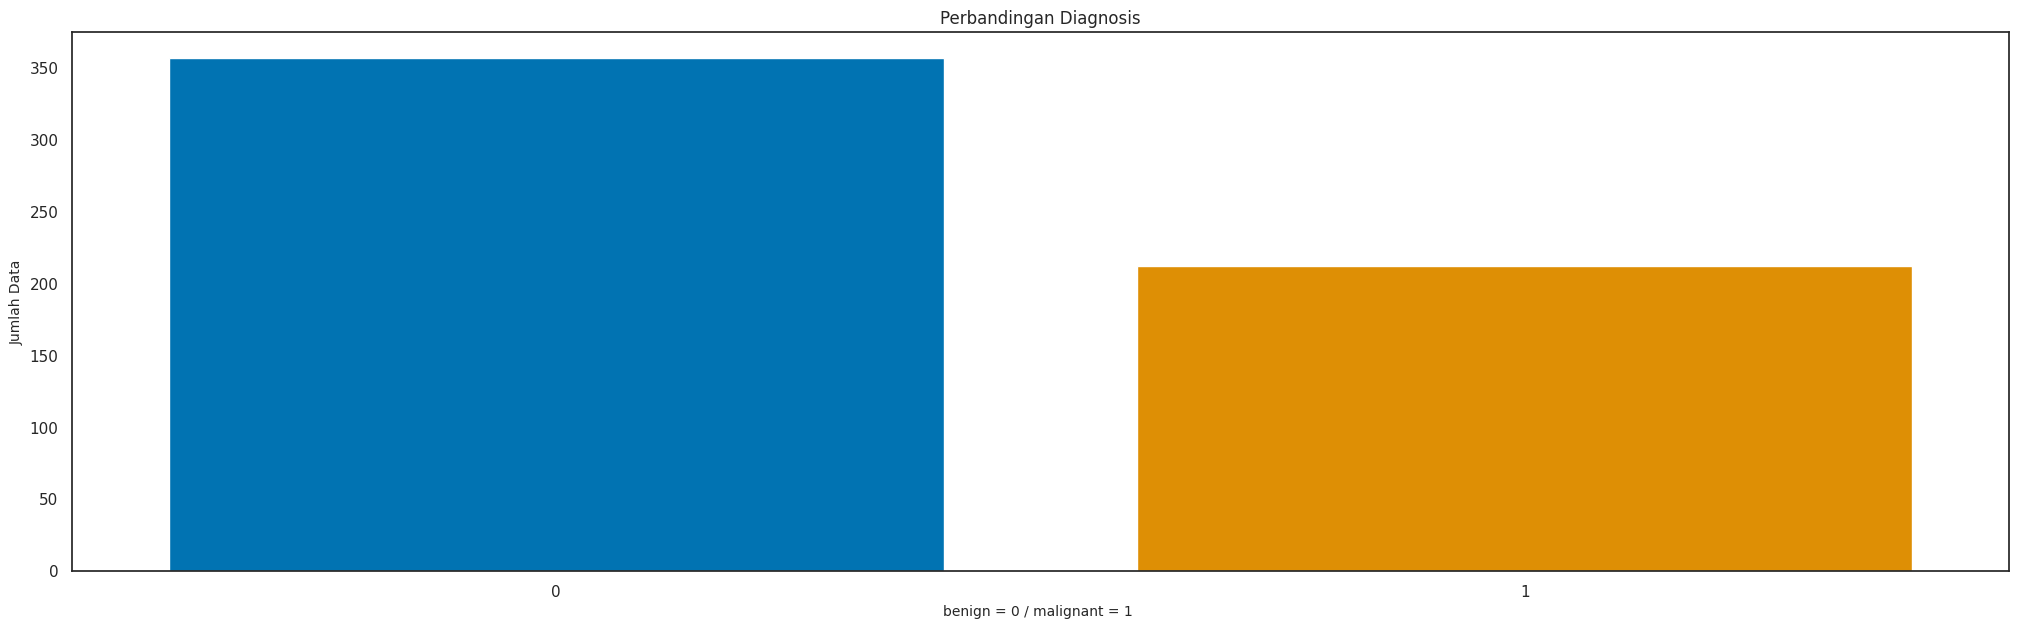

In [ ]:
plt.rcParams['figure.figsize']=25,7
sns.set_style("white")
ax = sns.countplot(x = data.diagnosis , saturation =1.5)
plt.xlabel("benign = 0 / malignant = 1 ", fontsize = 10 )
plt.ylabel("Jumlah Data", fontsize = 10)
plt.title('Perbandingan Diagnosis')

Dari visualisasi bar chart di atas, dapat diketahui perbandingan jumlah diagnosis Benign (warna biru) dan diagnosis Malignant (warna oranye). Jumlah Benign lebih banyak dari Malignant dengan selisih +/- 150 observasi.

## CONCAVE POINT_WORST (PEARSON 0.79)
Visualisasi untuk variabel "concave point_worst" yang memiliki nilai korelasi dengan variabel "diagnosis" sebesar 0.79"

<Axes: xlabel='concave points_worst'>

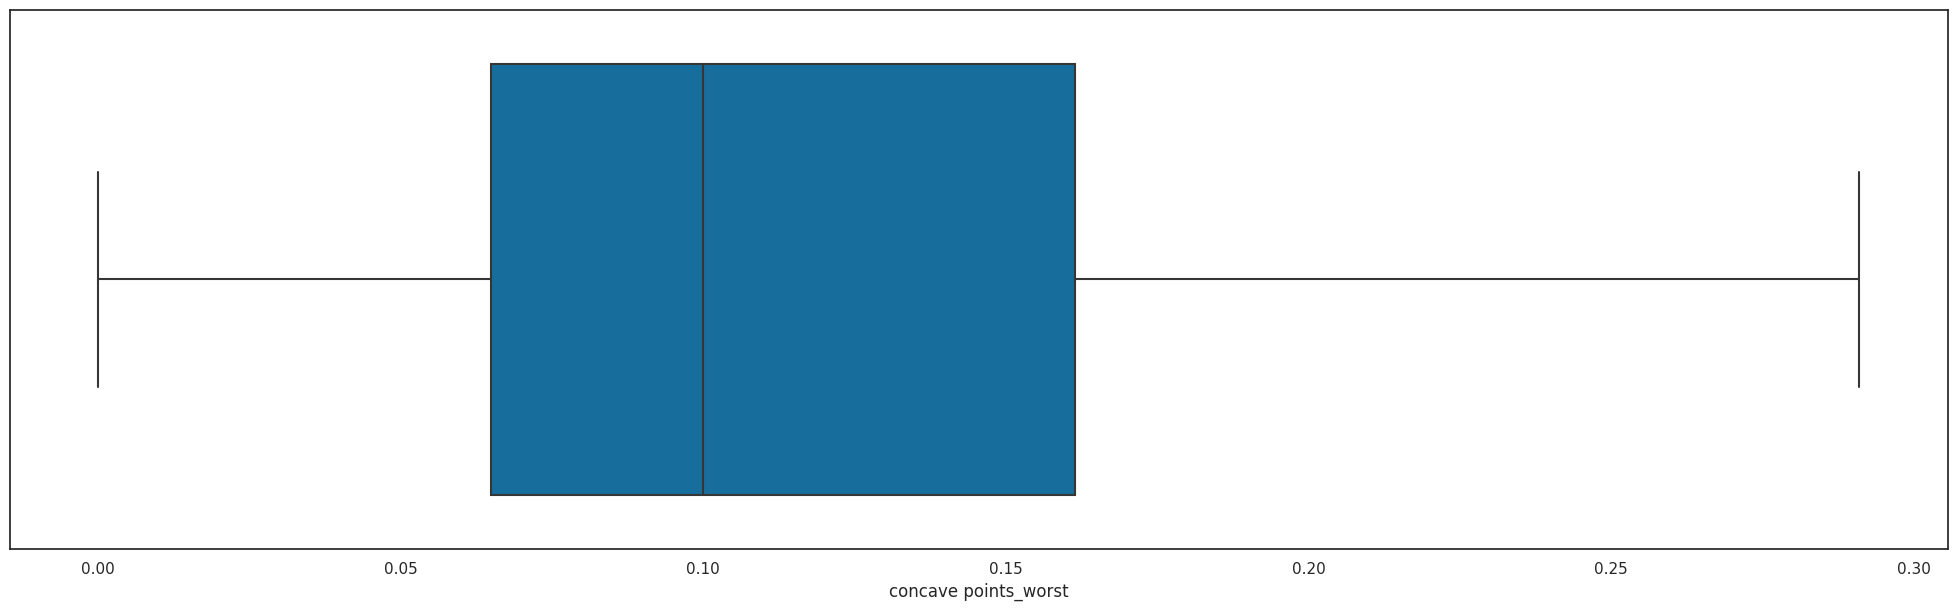

In [ ]:
sns.boxplot(x=data['concave points_worst'])

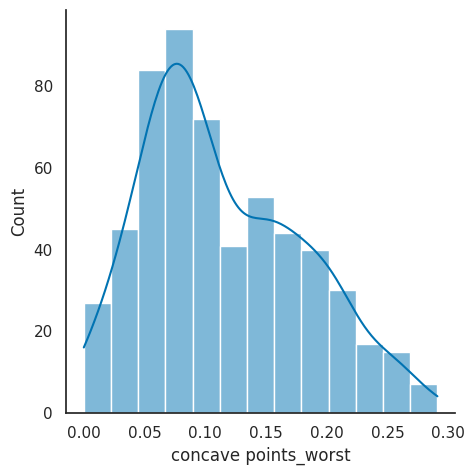

In [ ]:
sns.displot(data, x='concave points_worst', kde=True)

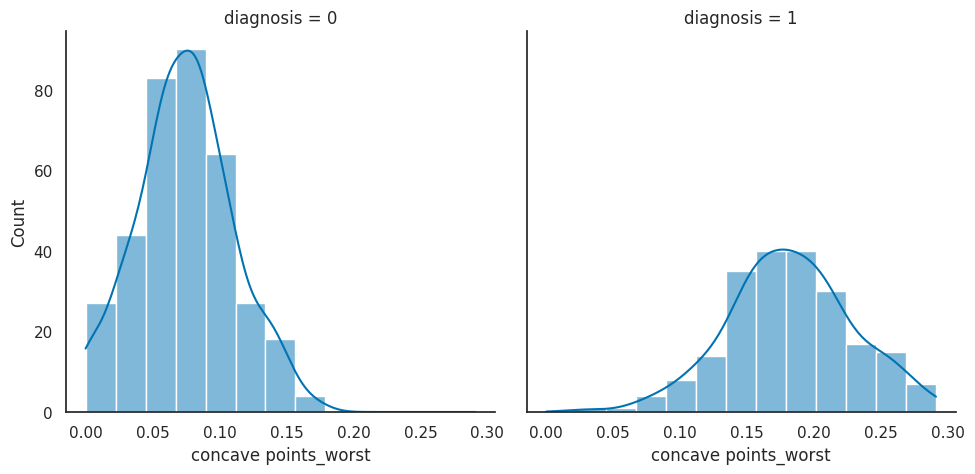

In [ ]:
sns.displot(data, x="concave points_worst", col="diagnosis", kde=True)

Dari visualisasi di atas, Malignant cenderung memiliki nilai yang lebih tinggi dan lebih variatif daripada Benign yang cenderung memiliki nilai yang lebih rendah dan lebih terpusat. Dari visualisasi ini dapat disimpulkan variabel "concave points_worst" dapat menjadi faktor penting dalam membedakan kelas 'Malignant' dan 'Benign' pada dataset tersebut.

## concavity_mean (pearson 0.7)
Visualisasi untuk variabel "concavity_mean" yang memiliki nilai korelasi dengan variabel "diagnosis" sebesar 0.7"

<Axes: xlabel='concavity_mean'>

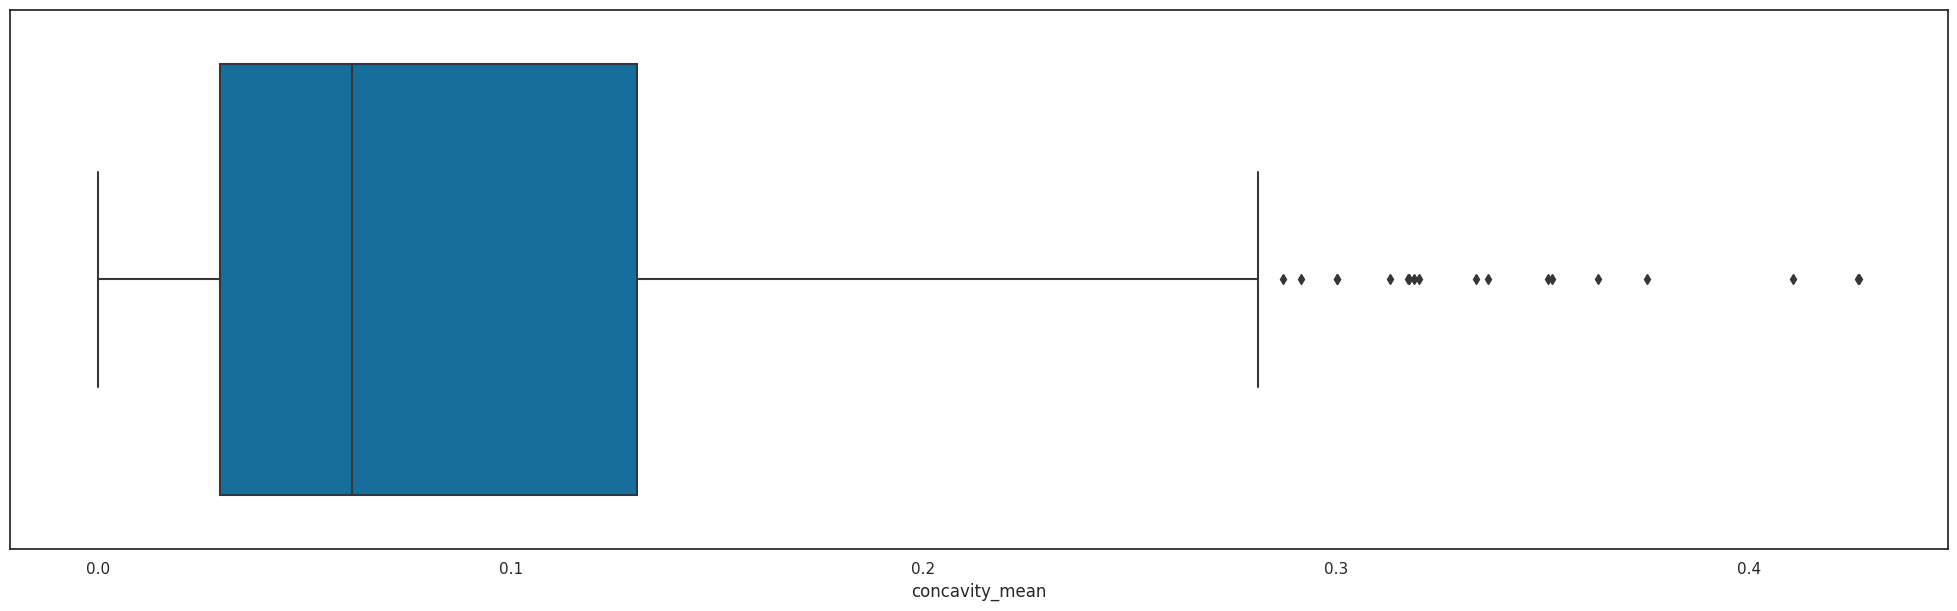

In [ ]:
sns.boxplot(x=data['concavity_mean'])

Dari visualisasi boxplot di atas, terlihat terdapat outlier pada variabel. Oleh karena itu selanjutnya adalah mengatasi outlier dengan cara menghapus outlier tersebut dari dataset.

In [ ]:
outlier = data[data['concavity_mean']>=0.25] # >=0.25 karena outlier terdapat pada titik tersebut
outlier.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
68,0,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.2520,0.1750,0.4228,0.11750
78,1,20.180,23.97,143.70,1245.0,0.1286,0.3454,0.3754,0.16040,0.2906,...,23.37,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
82,1,25.220,24.91,171.50,1878.0,0.1063,0.2665,0.3339,0.18450,0.1829,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,1,22.270,19.67,152.80,1509.0,0.1326,0.2768,0.4264,0.18230,0.2556,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789


In [ ]:
data = data[data['concavity_mean']<0.25] #hanya menyertakan observasi dari concavity_mean yang bernilai kurang dari 0.25
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


<Axes: xlabel='concavity_mean'>

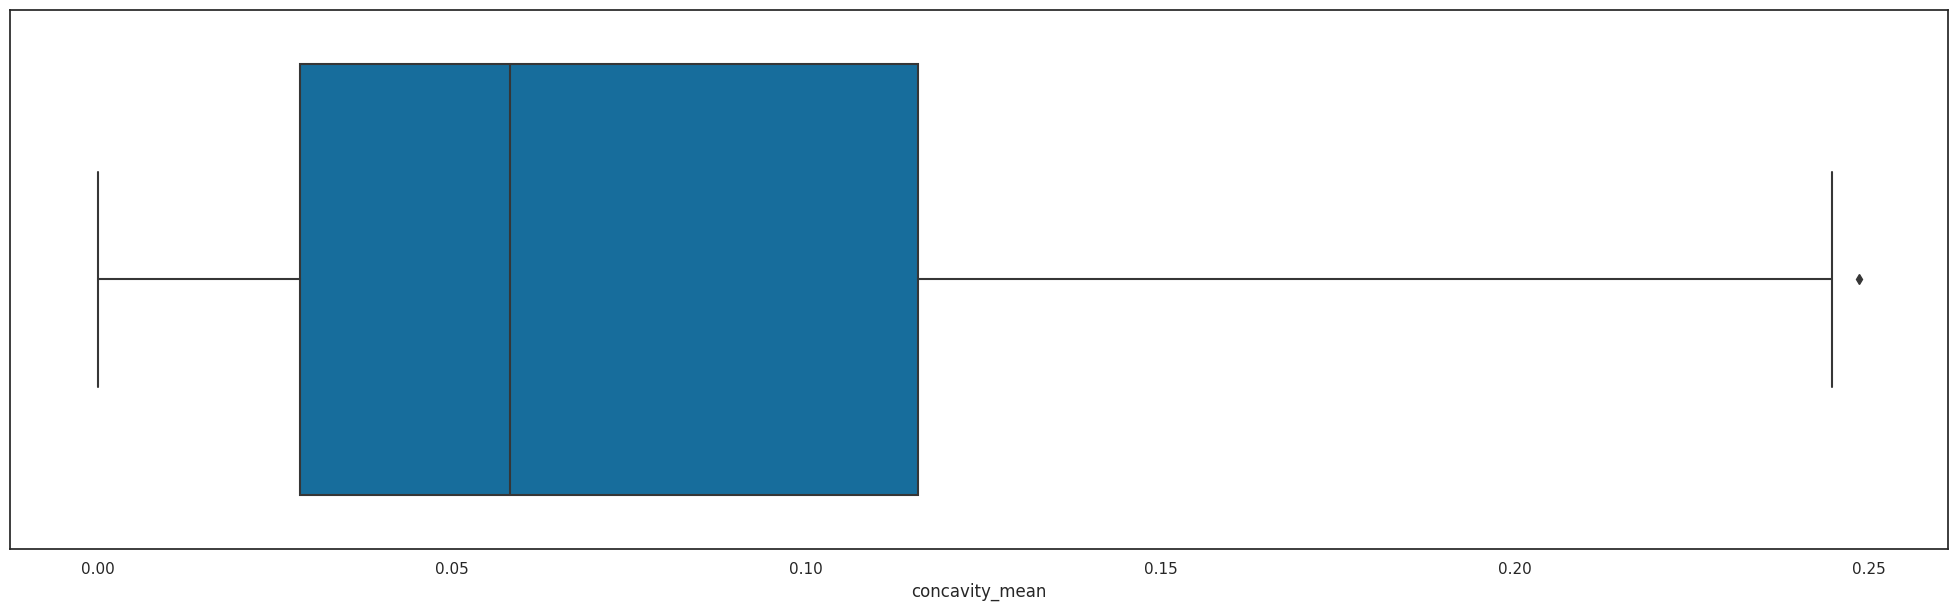

In [ ]:
sns.boxplot(x=data['concavity_mean'])

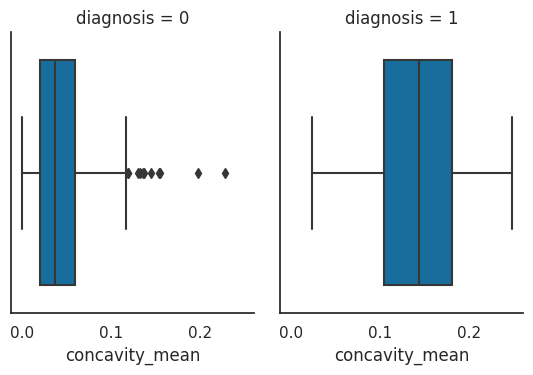

In [ ]:
sns.catplot(x="concavity_mean",
                col="diagnosis",
                data=data, kind="box",
                height=4, aspect=.7);

Dari visualisasi di atas dapat dilihat kelas Malignant dan Benign memiliki perbedaan yang signifikan. Malignant memiliki nilai median yang lebih tinggi dibandingkan dengan Benign. Rentang data Malignant juga lebih besar dibandingkan dengan Benign.
Distribusi variabel "concavity_mean" untuk Malignant dan Benign tidak simetris (skewed) dan condong ke nilai yang lebih tinggi. Perlu untuk menganalisis lebih jauh untuk memahami secara detail distribusi variabel "concavity_mean".

## perimeter_worst (pearson 0.78)
Visualisasi untuk variabel "perimeter_worst" yang memiliki nilai korelasi dengan variabel "diagnosis" sebesar 0.78"

<Axes: xlabel='perimeter_worst'>

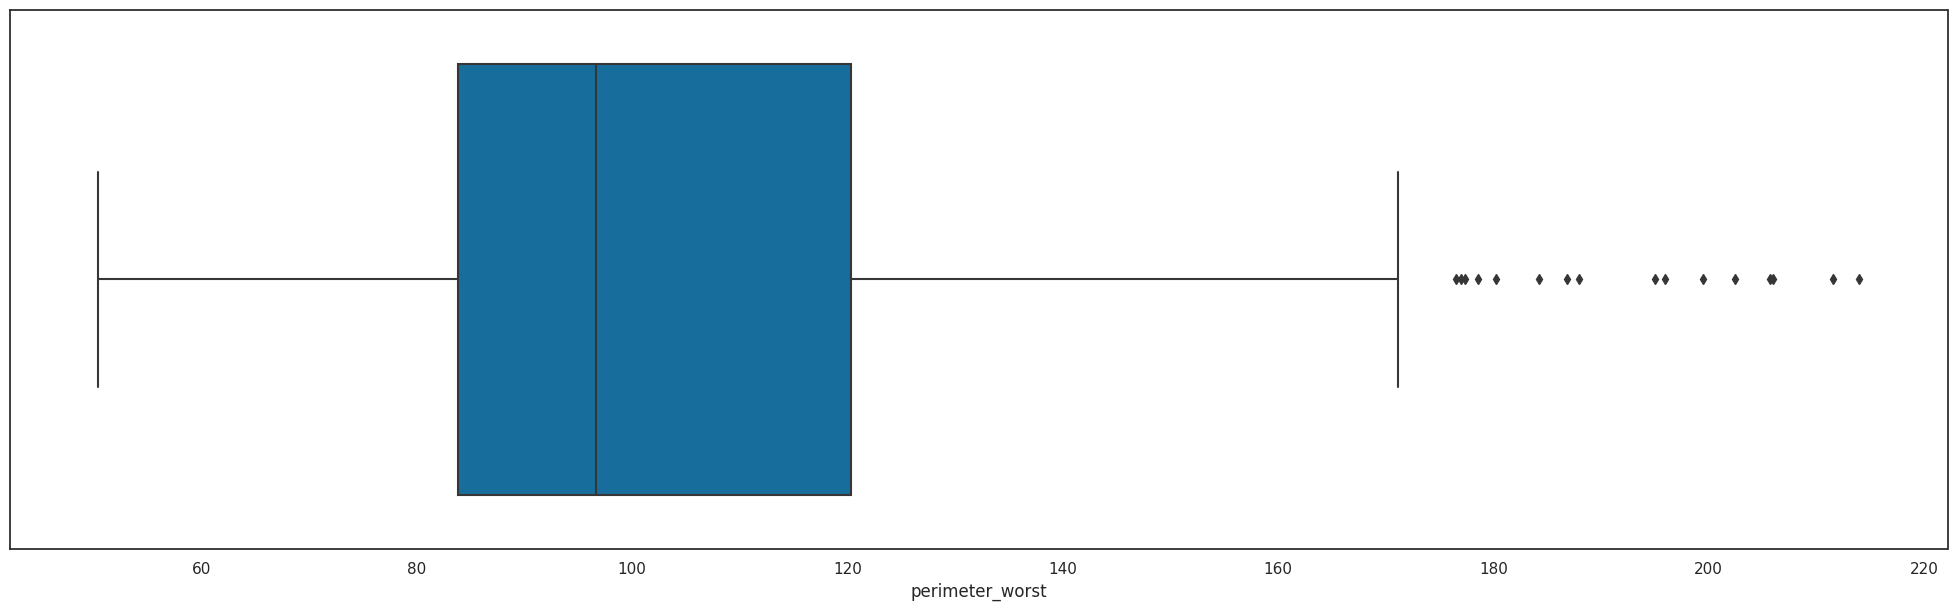

In [ ]:
sns.boxplot(x=data['perimeter_worst'])

Dari visualisasi boxplot di atas, terlihat terdapat outlier pada variabel. Oleh karena itu selanjutnya adalah mengatasi outlier dengan cara menghapus outlier tersebut dari dataset.

In [ ]:
outlier = data[data['perimeter_worst']>=165] # >=165 karean outlier berada pada titik tersebut
outlier.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
18,1,19.81,22.15,130.0,1260.0,0.09831,0.1027,0.1479,0.09498,0.1582,...,27.32,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615
23,1,21.16,23.04,137.2,1404.0,0.09428,0.1022,0.1097,0.08632,0.1769,...,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
24,1,16.65,21.38,110.0,904.6,0.11210,0.1457,0.1525,0.09170,0.1995,...,26.46,31.56,177.0,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564
42,1,19.07,24.81,128.3,1104.0,0.09081,0.2190,0.2107,0.09961,0.2310,...,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380
56,1,19.21,18.57,125.5,1152.0,0.10530,0.1267,0.1323,0.08994,0.1917,...,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294


In [ ]:
data = data[data['perimeter_worst']<165] #hanya menyertakan observasi variabel "perimeter_worst" yang kurang dari 165
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


<Axes: xlabel='perimeter_worst'>

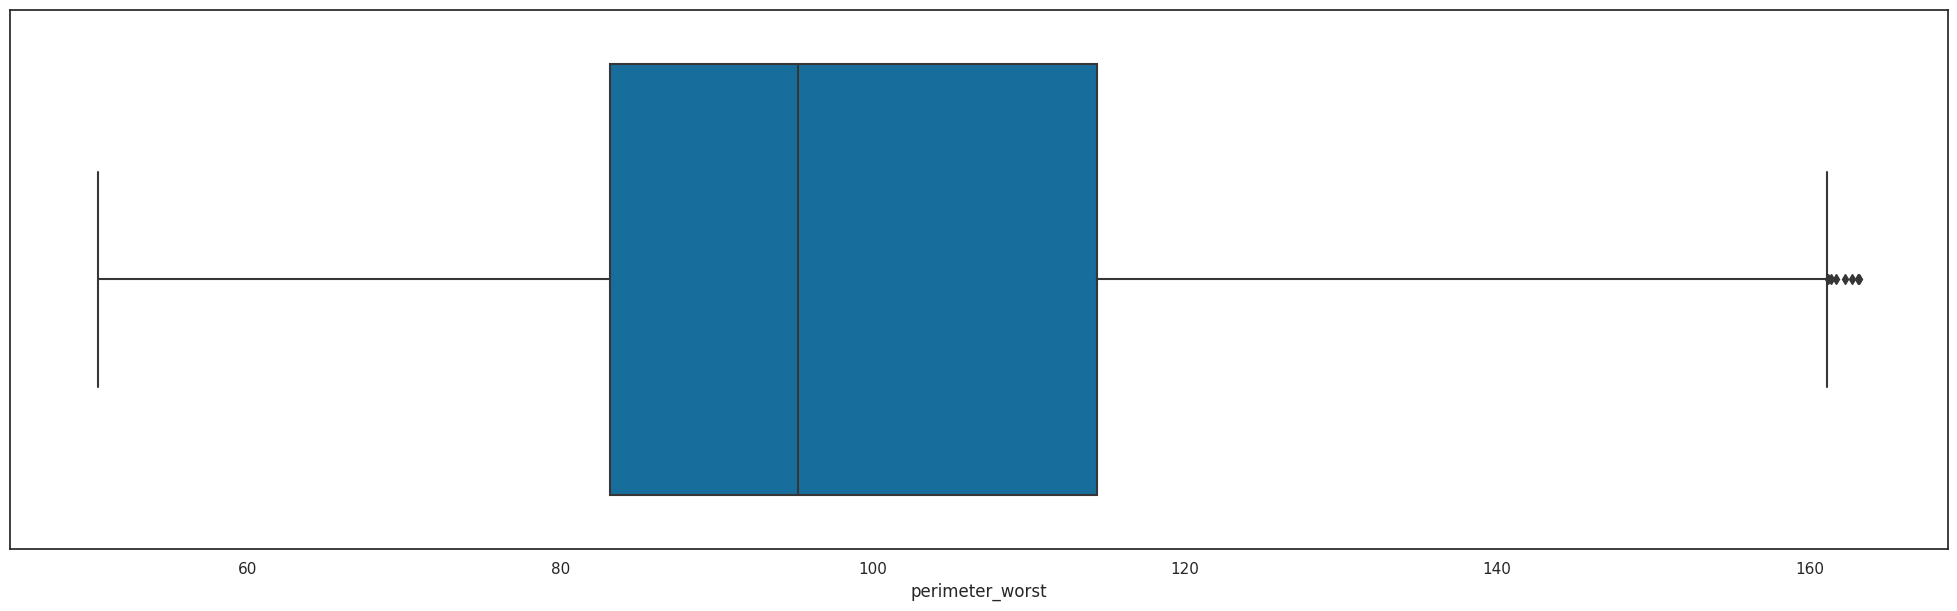

In [ ]:
sns.boxplot(x=data['perimeter_worst'])

# MACHINE LEARNING APLICATION

## SPLIT DATA

In [ ]:
#Memisahkan target variabel "diagnosis" dengan feature lainnya
x=data.drop('diagnosis',axis=1)
y=data.diagnosis

In [ ]:
print(x.shape)
print(y.shape)

(520, 25)
(520,)


In [ ]:
#Membagi data menjadi data training dan data testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3) #perbandingan 3:7 -> 30% untuk data testing dan 70% untuk data training

- x_train adalah data pelatihan feature yang digunakan untuk melatih model.
- x_test adalah data uji feature yang digunakan untuk menguji performa model.
- y_train adalah data pelatihan target yang sesuai dengan feature pada x_train.
- y_test adalah data uji target yang sesuai dengan feature pada x_test.

## FEATURES SCALING

In [ ]:
sc = StandardScaler() #untuk normalisasi data
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Dalam perintah sc.fit_transform(x_train) dan sc.transform(x_test), fungsi fit_transform dan transform digunakan untuk menghitung nilai rata-rata dan standar deviasi dari data pelatihan feature (x_train) dan kemudian menggunakan nilai tersebut untuk melakukan normalisasi pada data pelatihan dan data uji feature.

# CLASSIFICATION METHOD

## LOGISTIC REGRESSION

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1]
Koefisien Regresi:  [[ 0.38905908  0.64078989  0.37660214  0.43378913  0.06482175 -0.29541977
   0.74121667  0.68805066 -0.32146856  0.87146207  0.40783242  0.87880598
  -1.1793537   0.1217897   0.19127379  0.97763934  1.02251203  0.9426568
   0.99004108  1.04308861  0.13601993  0.95191928  0.74931734  0.63225534
   0.29124125]]
Odds Ratio:  [[1.47559173 1.89797948 1.45732438 1.54309345 1.06696882 0.74421912
  2.09848712 1.98983289 0.72508342 2.39040324 1.50355518 2.40802275
  0.3074774  1.12951654 1.21079091 2.65817379 2.78016988 2.56679182
  2.69134504 2.83796887 1.14570473 2.59067712 2.11555531 1.88185001
  1.33808736]]
P-value:  0.5720702915531579
Akurasi:  0.9743589743

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


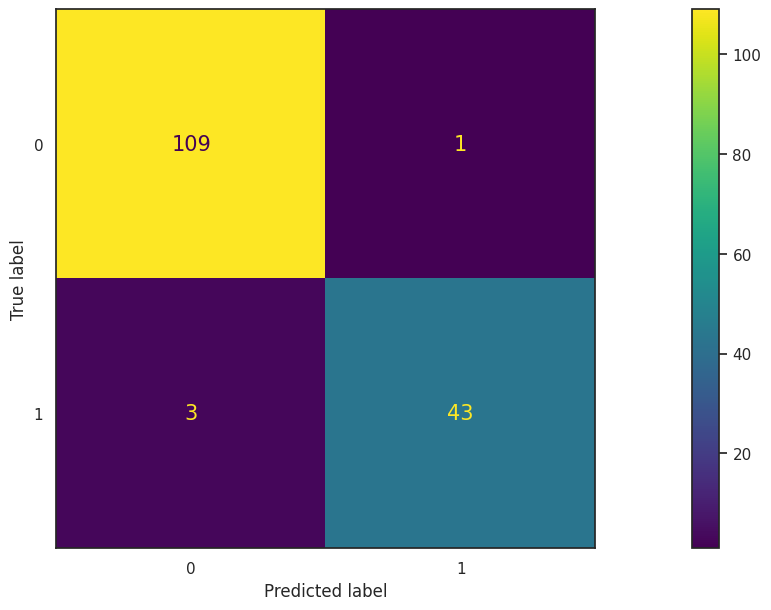

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report, confusion_matrix

# Membuat model regresi logistik
model = LogisticRegression()

# Melatih model dengan data latih
model.fit(x_train, y_train)

# Memprediksi variabel dependen dengan data uji
y_pred = model.predict(x_test)
print(y_pred)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Menampilkan koefisien regresi dan odds ratio
coef = model.coef_
odds_ratio = np.exp(coef)

print('Koefisien Regresi: ', coef)
print('Odds Ratio: ', odds_ratio)

# Menampilkan p-value
from scipy.stats import chi2

p_values = chi2.sf(model.score(x, y), 1)

print('P-value: ', p_values)

# Menampilkan akurasi model
print('Akurasi: ', accuracy)
print('Presisi: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)


- Akurasi model yang dihasilkan adalah sebesar 0.974 (97.4%). Artinya, model dapat memprediksi dengan benar 97.4% dari semua kasus pada data uji.
- Nilai Presisi model adalah 0.977
- Nilai recall adalah 0.935
- Nilai F1-score adalah 0.956
- Confusion matrix menunjukkan bahwa model berhasil memprediksi 109 kasus Benign dan 43 kasus Malignant dengan benar, dan 1 kasus Benign dan 3 kasus Malignant salah diprediksi.
- Koefisien regresi menunjukkan besarnya pengaruh setiap feature terhadap variabel dependen.
- Odds ratio menunjukkan rasio antara probabilitas kejadian variabel dependen diantara dua kelompok dengan nilai feature yang berbeda, dibandingkan dengan nilai fitur yang sama.
- P-value menunjukkan signifikansi statistik dari model. Semakin kecil p-value, semakin signifikan model dalam memprediksi variabel dependen.

## NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report

# Membuat model Naive-Bayes
model = GaussianNB()

# Melatih model dengan data latih
model.fit(x_train, y_train)

# Memprediksi variabel dependen dengan data uji
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 1]


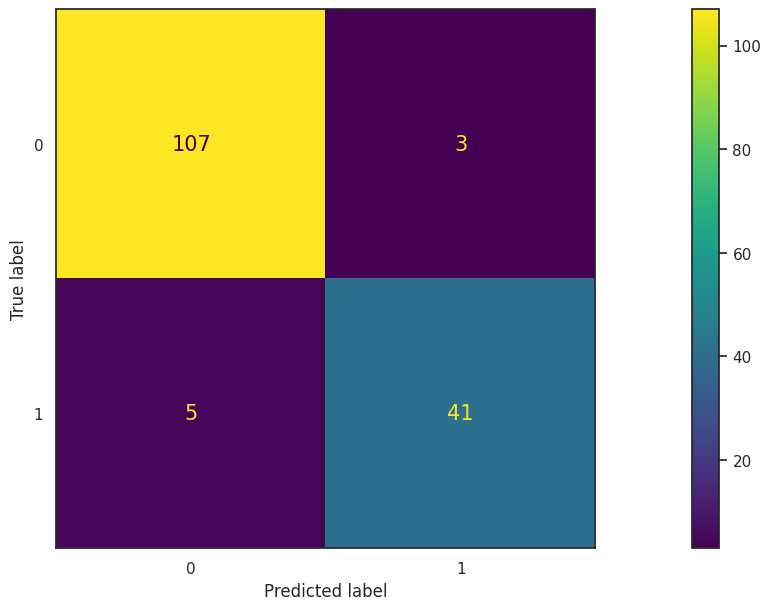

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menampilkan p-value
from scipy.stats import chi2

p_values = chi2.sf(model.score(x, y), 1)

print('P-value: ', p_values)

# Menampilkan akurasi model
print('Akurasi: ', accuracy)
print('Presisi: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)

P-value:  0.5720702915531579
Akurasi:  0.9487179487179487
Presisi:  0.9318181818181818
Recall:  0.8913043478260869
F1-score:  0.9111111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


- Akurasi model yang dihasilkan adalah sebesar 0.949 (94.9%). Artinya, model dapat memprediksi dengan benar 94.9% dari semua kasus pada data uji.
- Nilai Presisi model adalah 0.832
- Nilai recall adalah 0.891
- Nilai F1-score adalah 0.911
- Confusion matrix menunjukkan bahwa model berhasil memprediksi 107 kasus Benign dan 41 kasus Malignant dengan benar, dan 3 kasus Benign dan 5 kasus Malignant salah diprediksi.
- Koefisien regresi menunjukkan besarnya pengaruh setiap feature terhadap variabel dependen.
- Odds ratio menunjukkan rasio antara probabilitas kejadian variabel dependen diantara dua kelompok dengan nilai feature yang berbeda, dibandingkan dengan nilai fitur yang sama.
- P-value menunjukkan signifikansi statistik dari model. Semakin kecil p-value, semakin signifikan model dalam memprediksi variabel dependen.

## DECISION TREE

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


P-value:  0.5720702915531579
Akurasi:  0.9358974358974359
Presisi:  0.9090909090909091
Recall:  0.8695652173913043
F1-score:  0.888888888888889


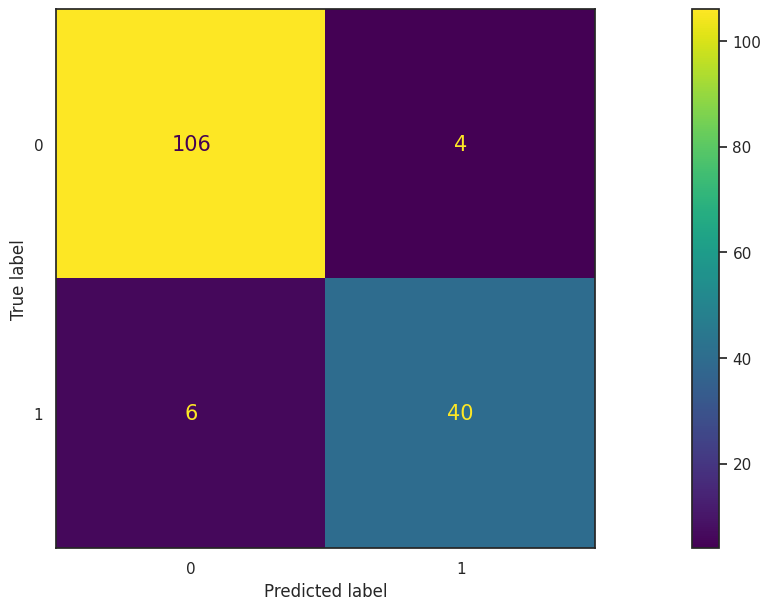

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
tree_clf = DecisionTreeClassifier()

# Melatih model dengan data latih
tree_clf.fit(x_train, y_train)

# Memprediksi variabel dependen dengan data uji
y_test_pred = tree_clf.predict(x_test)

# Menampilkan p-value
from scipy.stats import chi2
p_values = chi2.sf(tree_clf.score(x, y), 1)
print('P-value: ', p_values)

# Mengukur akurasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Menampilkan akurasi model
print('Akurasi: ', accuracy)
print('Presisi: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)

- Akurasi model yang dihasilkan adalah sebesar 0.935 (93.5%). Artinya, model dapat memprediksi dengan benar 93.5% dari semua kasus pada data uji.
- Nilai Presisi model adalah 0.909
- Nilai recall adalah 0.869
- Nilai F1-score adalah 0.888
- Confusion matrix menunjukkan bahwa model berhasil memprediksi 106 kasus Benign dan 40 kasus Malignant dengan benar, dan 4 kasus Benign dan 6 kasus Malignant salah diprediksi.

#KESIMPULAN
Berdasarkan hasil evaluasi model dari ketiga metode klasifikasi yang dilakukan, dapat disimpulkan bahwa model **Regresi Logistik bekerja lebih baik** daripada model Naive Bayes dan model Decission Tree pada dataset "Breast Cancer" yang digunakan. Hal ini tercermin dari nilai presisi, akurasi, recall, dan F1-score yang lebih tinggi pada model Regresi Logistik.

Namun, ketika memilih metode klasifikasi terbaik, faktor lain juga harus dipertimbangkan, seperti ukuran data, sifat masalah klasifikasi dan tujuan analisis yang ingin dicapai. Oleh karena itu, model Regresi Logistik belum tentu menjadi pilihan terbaik dalam semua kasus.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()

# The data set is presented in a dictionary form:
print(cancer.keys())